In [2]:
#9/9/24 Compares metrics
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import sys
import math

In [7]:
#ging = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
zeros = [1] * 500
ones = [0] * 500
ging = zeros + ones

bing = [0] * 1000
bing[0] = 1
bing[999] = 1

accout = []
mccout = []
loops = 0
for item in bing:
    bing[loops] = 1
    ling = metriccalc(ging, bing)
    accout.append(ling[6])
    mccout.append(ling[12])
    
    loops += 1

In [8]:
newacc = filtered_list = [x for x in accout if x != 0]
newmcc = filtered_list = [x for x in mccout if x != 0]

In [9]:
output = metriccalc(preds, acts)
print('accuracy =', output[0])
print('mcc =', output[1])

NameError: name 'preds' is not defined

In [73]:
gradient = np.diff(newmcc)

In [84]:
newacc[1]

0.501

In [77]:
newmcc[497]

0.996

In [79]:
498 / ((0.996 - 0.01828486648462095)*100)

5.093508149039678

In [36]:
len(newacc[:-1])

498

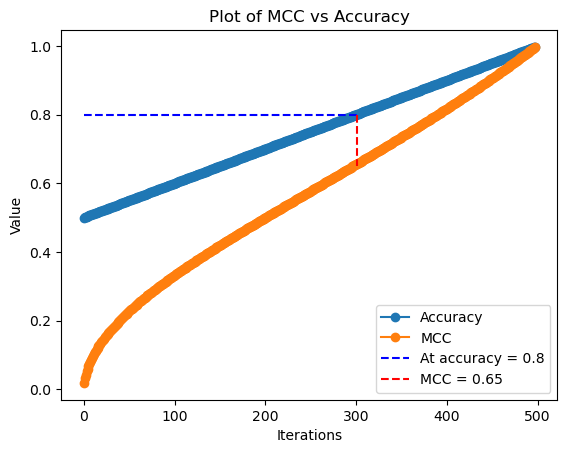

In [43]:
# Sample data
x = list(range(len(newacc[:-1])))
y1 = newacc[:-1]
y2 = newmcc
# Create a new figure
plt.figure()

# Plot the first list
plt.plot(x, y1, label='Accuracy', marker='o')

# Plot the second list
plt.plot(x, y2, label='MCC', marker='o')

# Add a title
plt.title('Plot of MCC vs Accuracy')

# Add x and y labels
plt.xlabel('Iterations')
plt.ylabel('Value')
x_horizontal = [0, 301]
y_horizontal = [0.8, 0.8]

x_diagonal = [301, 301]  # Adjust the end x-coordinate as needed
y_diagonal = [0.8, 0.65]

# Plot the horizontal segment
plt.plot(x_horizontal, y_horizontal, color='b', linestyle='--', label='At accuracy = 0.8')

# Plot the diagonal segment
plt.plot(x_diagonal, y_diagonal, color='r', linestyle='--', label='MCC = 0.65')
# Add a legend
plt.legend()

# Show the plot
plt.show()

In [30]:
loops = 0
item = 0
while item < 0.80:
    item = newacc[loops]
        
    loops += 1

In [31]:
newmcc[loops]

0.6565465617759294

In [20]:
loops

301

In [21]:
item

0.8

In [5]:
def metriccalc(preds, ytrain):
    import math
    correctcount = 0
    fpcount = 0
    tpcount = 0
    tncount = 0
    fncount = 0
    testpos = 0
    testneg = 0
    
    #loop through each item in the predictions, logging positives, negatives and tn/tp/fn/tp
    iterations = 0
    for value in preds:
        testscore = ytrain[iterations]
        if value == 1:
            if testscore != 0:
                testpos = testpos + 1
                correctcount = correctcount + 1
                tpcount = tpcount + 1
            else:
                fpcount = fpcount + 1
                testneg = testneg + 1
        else:
            if testscore != 0:
                testpos = testpos + 1
                fncount = fncount + 1
            else:
                testneg = testneg + 1
                correctcount = correctcount + 1
                tncount = tncount + 1

        iterations = iterations + 1
    if tncount == 0 or fncount == 0 or tpcount == 0 or fpcount == 0 or testneg == 0 or testpos == 0:
        return [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    #calculate a wide swathe of metrics
    netfn = fncount / (fncount + tncount)
    nettn = tncount / (fncount + tncount)
    netacc = correctcount / (fpcount + fncount + tpcount + tncount)
    posacc = tpcount / testpos
    negacc = tncount / testneg
    netfp = fpcount / (fpcount + tpcount)
    nettp = tpcount / (tpcount + fpcount)

    fpr = fpcount / (fpcount + tncount)
    tpr = tpcount / (tpcount + fncount)



    f1 = (2 * tpcount) / ((2 * tpcount) + fpcount + fncount)


    tp = tpcount
    fp = fpcount
    tn = tncount
    fn = fncount

    
    temp = math.sqrt((fp + tn) * (tp + fp) * (tp + fn) * (tn + fn))
    if temp == 0:
        return 0
    mcc = ((tp * tn) - (fp * fn)) / temp



    temp = (( ( (tp + fp) * (fp + tn) ) + ( (tp + fn) * (fn + tn) ) ))
    if temp == 0:
        return 0
    kapp =  ( 2 * ((tp * tn) - (fn * fp)) ) / temp
    
    metriclist = [testpos, testneg, fn, tn, tp, fp, netacc, posacc, negacc, fpr, tpr, f1, mcc, kapp]
    
    return metriclist